In [16]:
import pandas as pd
from pandas import option_context
import numpy as np
import requests
import seaborn as sns
import datetime
import cliffsDelta as cd

from tqdm import tqdm
from statsmodels.stats.inter_rater import fleiss_kappa,aggregate_raters
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

In [17]:
QUERY_ROOT = "https://api.github.com"
#TOKEN = #write your GitHub API key here
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify the GitHub Apps in the list of accounts, by calling the GitHub Users API and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is an app, if it is "User", then it is an account.

In [18]:
# 1. Read the given .csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
df = pd.read_csv('homebrew_homebrew-core_2/homebrew_homebrew-core_2.csv')
df.columns = ['contributor', 'bothunter']
print(df)


                contributor bothunter
0                 timsutton     Human
1           semgrep-ci[bot]       Bot
2                  mhmdanas     Human
3                     gdams     Human
4                      dnhn     Human
5                     dopey     Human
6             robsonpeixoto     Human
7                    jeroen     Human
8              reitermarkus     Human
9               pOmelchenko     Human
10                   miccal     Human
11      circleci-deploy-bot       Bot
12                    cho-m     Human
13                      afh     Human
14                moonfruit     Human
15             nicklockwood     Human
16                   kashif     Human
17             kubeshop-bot       Bot
18          404NetworkError     Human
19                   bojand     Human
20                 flow-bot       Bot
21            nandahkrishna     Human
22              FtZPetruska     Human
23                 bayandin     Human
24                   youtux     Human
25          

In [19]:
# 1. Store the names of the contributors in a list using the code snippet: 'df.contributor.to_list()'
# 2. print the list

# YOUR CODE BELOW
names = df.contributor.to_list()
print(names)

['timsutton', 'semgrep-ci[bot]', 'mhmdanas', 'gdams', 'dnhn', 'dopey', 'robsonpeixoto', 'jeroen', 'reitermarkus', 'pOmelchenko', 'miccal', 'circleci-deploy-bot', 'cho-m', 'afh', 'moonfruit', 'nicklockwood', 'kashif', 'kubeshop-bot', '404NetworkError', 'bojand', 'flow-bot', 'nandahkrishna', 'FtZPetruska', 'bayandin', 'youtux', 'bepsvpt', 'crunchtime-ali', 'queengooborg', 'cloudpossebot', 'Loyalsoldier', 'alerque', 'Amar1729', 'github-merge-queue[bot]', 'MindTooth', 'manphiz', 'athas', 'kozlovic', 'nodenv-bot', 'git-machete-bot', 'github-actions[bot]']


In [20]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    above and 'contributor' is each individul contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over this JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is an App, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is an App (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_list_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW
app_list_dict = []
for contributor in names:
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    dictionary = { "contributor" : contributor , "app" : (json_response["type"] == "Bot")}
    app_list_dict.append(dictionary)
df_app = pd.DataFrame.from_dict(app_list_dict)
print(df_app)

                contributor    app
0                 timsutton  False
1           semgrep-ci[bot]   True
2                  mhmdanas  False
3                     gdams  False
4                      dnhn  False
5                     dopey  False
6             robsonpeixoto  False
7                    jeroen  False
8              reitermarkus  False
9               pOmelchenko  False
10                   miccal  False
11      circleci-deploy-bot  False
12                    cho-m  False
13                      afh  False
14                moonfruit  False
15             nicklockwood  False
16                   kashif  False
17             kubeshop-bot  False
18          404NetworkError  False
19                   bojand  False
20                 flow-bot  False
21            nandahkrishna  False
22              FtZPetruska  False
23                 bayandin  False
24                   youtux  False
25                  bepsvpt  False
26           crunchtime-ali  False
27             queen

### Question 2

#### Add an app column in the CSV file to store this information. You can write True if it is an app and False if it is not.


In [21]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter and app.

# YOUR CODE BELOW
df = pd.merge(df, df_app, on='contributor')
print(df)

                contributor bothunter    app
0                 timsutton     Human  False
1           semgrep-ci[bot]       Bot   True
2                  mhmdanas     Human  False
3                     gdams     Human  False
4                      dnhn     Human  False
5                     dopey     Human  False
6             robsonpeixoto     Human  False
7                    jeroen     Human  False
8              reitermarkus     Human  False
9               pOmelchenko     Human  False
10                   miccal     Human  False
11      circleci-deploy-bot       Bot  False
12                    cho-m     Human  False
13                      afh     Human  False
14                moonfruit     Human  False
15             nicklockwood     Human  False
16                   kashif     Human  False
17             kubeshop-bot       Bot  False
18          404NetworkError     Human  False
19                   bojand     Human  False
20                 flow-bot       Bot  False
21        

### Question 3

#### Report on the total number of GitHub Apps, and User accounts present in the list of accounts of your dataset.

In [22]:
# GitHub Apps = 9
# GitHub Users = 31

## Section 4

### Question 1

#### Write an automated script to report on the prediction of the GitHub accounts in your dataset, using BoDeGHa and RABBIT bot identification tools. For each tool, your script should add an extra column to the CSV ﬁle of your dataset, reporting the prediction (bot, human, unknown) of the considered tool on the considered account.

#### More information:
You can write an automated script to execute BoDeGHa and RABBIT, and save the results in a DataFrame. For BoDeGHa, you can ask the tool to give the output in CSV format, save it as a csv file and read it in a DataFrame. For RABBIT, you can use its internal argument to store the results in a .csv file and read it in a DataFrame. Remember to read their Documentation (Readme.md) for their input arguments and example outputs before using these tools.  
Similar to what you did in Section 2 - Question 1 and 2, add an additional column named 'bodegha' to store the predictions 
given by BoDeGHa and add another column called 'rabbit' to store the preditions given by RABBIT. 

In [23]:
# Read the .csv file that has the predicitons given by BoDeGHa.

# YOUR CODE BELOW

df_bodegha = pd.read_csv('bodegha_predictions.csv')
df_bodegha.columns = ['contributor', 'bodegha']
print(df_bodegha)


            contributor bodegha
0           FtZPetruska     Bot
1         cloudpossebot     Bot
2        crunchtime-ali     Bot
3              flow-bot     Bot
4       git-machete-bot     Bot
5   github-actions[bot]     Bot
6              bayandin   Human
7                 cho-m   Human
8                  dnhn   Human
9                jeroen   Human
10               miccal   Human
11            moonfruit   Human
12            timsutton   Human


In [24]:
# merge it to df - Now your df should have the following four columns - contributor, bothunter, app, bodegha

# YOUR CODE BELOW

df = pd.merge(df, df_bodegha, on='contributor')
print(df)


            contributor bothunter    app bodegha
0             timsutton     Human  False   Human
1                  dnhn     Human  False   Human
2                jeroen     Human  False   Human
3                miccal     Human  False   Human
4                 cho-m     Human  False   Human
5             moonfruit     Human  False   Human
6              flow-bot       Bot  False     Bot
7           FtZPetruska     Human  False     Bot
8              bayandin     Human  False   Human
9        crunchtime-ali     Human  False     Bot
10        cloudpossebot       Bot  False     Bot
11      git-machete-bot       Bot  False     Bot
12  github-actions[bot]       Bot   True     Bot


In [25]:
# Read the predictions given by RABBIT from the corresponding .csv file 

# YOUR CODE BELOW

df_rabbit = pd.read_csv('rabbit_predictions.csv')
df_rabbit = df_rabbit.drop('num', axis=1)
df_rabbit = df_rabbit.drop('confidence', axis=1)
df_rabbit.columns = ['contributor', 'rabbit']
print(df_rabbit)



                contributor rabbit
0                 timsutton  human
1           semgrep-ci[bot]    app
2                  mhmdanas  human
3                     gdams  human
4                      dnhn    bot
5                     dopey  human
6             robsonpeixoto  human
7                    jeroen  human
8              reitermarkus  human
9               pOmelchenko  human
10                   miccal  human
11      circleci-deploy-bot    bot
12                    cho-m  human
13                      afh  human
14                moonfruit  human
15             nicklockwood  human
16                   kashif  human
17             kubeshop-bot    bot
18          404NetworkError  human
19                   bojand  human
20                 flow-bot    bot
21            nandahkrishna    bot
22              FtZPetruska  human
23                 bayandin  human
24                   youtux  human
25                  bepsvpt  human
26           crunchtime-ali  human
27             queen

In [26]:
# merge it to df - Now your df should have the following five columns - contributor, bothunter, app, bodegha, rabbit

# YOUR CODE BELOW
df = pd.merge(df, df_rabbit, on='contributor')
print(df)

            contributor bothunter    app bodegha rabbit
0             timsutton     Human  False   Human  human
1                  dnhn     Human  False   Human    bot
2                jeroen     Human  False   Human  human
3                miccal     Human  False   Human  human
4                 cho-m     Human  False   Human  human
5             moonfruit     Human  False   Human  human
6              flow-bot       Bot  False     Bot    bot
7           FtZPetruska     Human  False     Bot  human
8              bayandin     Human  False   Human  human
9        crunchtime-ali     Human  False     Bot  human
10        cloudpossebot       Bot  False     Bot    bot
11      git-machete-bot       Bot  False     Bot    bot
12  github-actions[bot]       Bot   True     Bot    app


In [27]:
# Replace the prediction result given by rabbit from 'bot' to 'Bot', 'app' to 'Bot', 'human' to 'Human', 'unknown' to 'Unknown' to maintain consistency

# YOUR CODE BELOW

df.loc[df["rabbit"] == "bot", "rabbit"] = "Bot"
df.loc[df["rabbit"] == "app", "rabbit"] = "Bot"
df.loc[df["rabbit"] == "human", "rabbit"] = "Human"
df.loc[df["rabbit"] == "unknown", "rabbit"] = "Unknown"
print(df)


            contributor bothunter    app bodegha rabbit
0             timsutton     Human  False   Human  Human
1                  dnhn     Human  False   Human    Bot
2                jeroen     Human  False   Human  Human
3                miccal     Human  False   Human  Human
4                 cho-m     Human  False   Human  Human
5             moonfruit     Human  False   Human  Human
6              flow-bot       Bot  False     Bot    Bot
7           FtZPetruska     Human  False     Bot  Human
8              bayandin     Human  False   Human  Human
9        crunchtime-ali     Human  False     Bot  Human
10        cloudpossebot       Bot  False     Bot    Bot
11      git-machete-bot       Bot  False     Bot    Bot
12  github-actions[bot]       Bot   True     Bot    Bot


### Question 2

#### Add an extra column to the CSV ﬁle called 'manual' that has the label determined by you. For each account, of your own opinion on its nature (bot, human or unknown only in case of doubt) on the basis of a manual veriﬁcation of the contributor’s activities in the repository through the GitHub UI and through the GitHub Events API https://api.github.com/users/username/events, and taking into account the prediction made by the bot identification tools.

#### More information:
For each contributor, look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor\>/events, to make a decision on their type. 

In addition, you should also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This might be useful to answer the next question as well.

In [28]:
# Write your manual decision here
# example : 
# manual_list_dict = [{'contributor': 'tommens', 'manual': 'human'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW


In [29]:
# merge it with df of predictions. Now your df should have the following six columns
# contributor, bothunter, app, bodegha, rabbit, manual

# YOUR CODE BELOW


### Question 3

#### Study and report the purpose of these identified bots and humans in the repository assigned to you. 

For example, the purpose can be based on but not limited to - 

the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), type of comments they are posting (reviewing code, test summary report), when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on. \textbf{Note:} The purpose can be other than what is provided in examples above. 


### Question 4

#### Create a column named 'type' to the CSV ﬁle and write your ﬁnal decision on the type of contributor. The ﬁnal decision on their type is the prediciton that majority of the raters predicted (you can ignore the 'Unknown'), in the case of contradiction, you can finalise it as Human.
#### Case 1: If two raters has mentioned a contributor as Bot and others mentioned it as 'Unknown', then the type of the account is Bot.  
#### Case 2: If 3 raters give 'Unknown' to a contributor then the prediction given by the fourth rater is final.
#### Case 3: If 2 raters give the prediciton as 'Bot' and 2 raters give it as 'Human', then the final decision is 'Human'
#### In this step, GitHub Apps should be marked as App and not as a Bot.

In [30]:
# Make a final decision on the type based on the predictions given by bothunter, bodegha, bothunter and your manual labelling. 
# Now your df should contain seven columns - contributor, bothunter, app, bodegha, rabbit, manual and type

# YOUR CODE BELOW
type_list = []
for i in range(len(df)):
    n_bot = 0
    n_human = 0
    n_unknown = 0
    for j in [1,2,3,4]:
        if df.iloc[i,j] == "Bot":
            n_bot+=1
        elif df.iloc[i,j] == "Human":
            n_human+=1
        elif df.iloc[i,j] == "Unknown":
            n_unknown+=1
    if df.iloc[i,2] == True:
        type_list.append("App")
    elif n_bot >= 2:
        type_list.append("Bot")
    elif n_unknown == 2:
        if n_bot == 1:
            type_list.append("Bot")
        elif n_human == 1:
            type_list.append("Human")
    elif (n_human >= 2):
        type_list.append("Human")
print(type_list)
df['type'] = type_list
print(df)


['Human', 'Human', 'Human', 'Human', 'Human', 'Human', 'Bot', 'Human', 'Human', 'Human', 'Bot', 'Bot', 'App']
            contributor bothunter    app bodegha rabbit   type
0             timsutton     Human  False   Human  Human  Human
1                  dnhn     Human  False   Human    Bot  Human
2                jeroen     Human  False   Human  Human  Human
3                miccal     Human  False   Human  Human  Human
4                 cho-m     Human  False   Human  Human  Human
5             moonfruit     Human  False   Human  Human  Human
6              flow-bot       Bot  False     Bot    Bot    Bot
7           FtZPetruska     Human  False     Bot  Human  Human
8              bayandin     Human  False   Human  Human  Human
9        crunchtime-ali     Human  False     Bot  Human  Human
10        cloudpossebot       Bot  False     Bot    Bot    Bot
11      git-machete-bot       Bot  False     Bot    Bot    Bot
12  github-actions[bot]       Bot   True     Bot    Bot    App


### Question 5 (a)

#### Compute and report the Fleiss Kappa interrater agreement score between the labels computed by all bot identiﬁcation tools.

##### For example:

converted_df = aggregate_raters(np.array(df[['rater1','rater2']]))  
kappa = fleiss_kappa(converted_df[0])  
print('kappa')  

#### a. between bothunter and rabbit

In [31]:
converted_df = aggregate_raters(np.array(df[['bothunter','rabbit']]))
kappa = fleiss_kappa(converted_df[0])
print(kappa)

0.8300653594771243


#### b. between bothunter and bodegha

In [32]:
converted_df = aggregate_raters(np.array(df[['bothunter','bodegha']]))
kappa = fleiss_kappa(converted_df[0])
print(kappa)

0.6749999999999999


#### c. between bodegha and rabbit

In [33]:
converted_df = aggregate_raters(np.array(df[['bodegha','rabbit']]))
kappa = fleiss_kappa(converted_df[0])
print(kappa)

0.5272727272727274


#### d. between bothunter, bodegha and rabbit

In [34]:
converted_df = aggregate_raters(np.array(df[['bothunter','rabbit','bodegha']]))
kappa = fleiss_kappa(converted_df[0])
print(kappa)

0.6749999999999999


### Question 5 (b)
#### Report on
#### a. What is you interpretation from the kappa values (use the table provided in the description document)? what do you understand?

In [35]:
#We can say that:
# bothunter and rabbit are in perfect agreement
# bothunter and bodegha are substantial agreement
# bodegha and rabbit are moderate agreement
# all 3 are substantial agreement
# We can underline that all bots agree on the type of user in general.

#### b. Based on your previous analysis, which bot identification tool would you use, if you want to predict if a contributor is a human or bot? Motivate your answer

In [36]:
# I would use bothunter because it is the tool that agrees the best with the other tools.

## Section 5

#### Query the GitHub Events API to get maximum possible events for each contributor (maximum is 300 events).  
#### You can use the following query: '{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}' where page = 1 or 2 or 3  
#### As you did in earlier task, make a request to GitHub Events API with the required headers, convert the response to JSON, extract the following fields and store in a DataFrame:
Event id - json_response['event_id']  
Name of the contributor - json_response['actor']['login']  
Name of the repository - json_response['repository']['name']  
Type of event - json_response['type']  
Time of event - json_response['created_at']

#### Hint: Query the GitHubEvents API for all contributors. Append the obtained JSON result to a list of JSONs. Process one dictionary after other to get your required fields and store them in another list of dictionaries. Finally convert this dictionaty to DataFrame. OR You can directly convert the list of JSONs to DataFrame using pd.json_normalize() and select the required columns alone.

#### The resultant dataframe should have all the recent events performed by all the contributors and the following columns should be present in them - event_id, contributor, repo_name, event_type, created_at.


In [38]:
# YOUR CODE BELOW
app_list_dict = []
for contributor in names:
    for page in range(1,4):
        query = f'{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}'
        response = requests.get(query, headers=HEADERS)
        json_response = response.json()
        for event in json_response:
            event_id = event['id']  
            name_contributor = event['actor']['login']  
            name_repo = event['repo']['name']  
            event_type = event['type']  
            event_time = event['created_at']
            intern_dico = {'event_id' : event_id, 'contributor' : name_contributor, 'repo_name' : name_repo,
                        'event_type' : event_type, 'created_at' : event_time}
            app_list_dict += [intern_dico]
dataframe = pd.DataFrame.from_dict(app_list_dict)
print(dataframe)

         event_id          contributor  \
0     36985587760            timsutton   
1     36950961783            timsutton   
2     36950947282            timsutton   
3     36913393665            timsutton   
4     36894024387            timsutton   
...           ...                  ...   
8621  37003002081  github-actions[bot]   
8622  37003002075  github-actions[bot]   
8623  37003001399  github-actions[bot]   
8624  37003002007  github-actions[bot]   
8625  37003001984  github-actions[bot]   

                                              repo_name  \
0                                ericbeland/ruby-packer   
1                                        dry-rb/dry-cli   
2                             rngtng/dry-cli-completion   
3                                        SUPERCILEX/fuc   
4                                Homebrew/homebrew-core   
...                                                 ...   
8621  sigstore-conformance/extremely-dangerous-publi...   
8622                   

### Question 1
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['contributor','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and  
5. finally merge it with your 'type' field from the DataFrame you got in Section4

The final DataFrame should be looking like the following  
![](event_group.png)

In [39]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewEvent','PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

type = []
for ind in dataframe.index :
    if dataframe["event_type"][ind] in issue_group:
        type.append("Issues")
    elif dataframe["event_type"][ind] in pr_group:
        type.append("Pull Requests")
    elif dataframe["event_type"][ind] in commit_group:
        type.append("Commits")
    elif dataframe["event_type"][ind] in repo_group:
        type.append("Repository")
    #else:
        #type.append("Unknown")
print(type)


['Repository', 'Repository', 'Repository', 'Repository', 'Pull Requests', 'Commits', 'Pull Requests', 'Pull Requests', 'Commits', 'Issues', 'Commits', 'Pull Requests', 'Commits', 'Commits', 'Repository', 'Pull Requests', 'Commits', 'Repository', 'Pull Requests', 'Issues', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Commits', 'Pull Requests', 'Issues', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Commits', 'Commits', 'Pull Requests', 'Pull Requests', 'Issues', 'Pull Requests', 'Pull Requests', 'Commits', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Repository', 'Pull Requests', 'Pull Requests', 'Repository', 'Issues', 'Commits', 'Pull Requests', 'Repository', 'Issues', 'Issues', 'Pull Requests', 'Repository', 'Pull Requests', 'Pull Requests', 'Issues', 'Pull Requests', 'Issues', 'Commits', 'Issues', 'Pull Requests', 'Pull Requests', 'Pull Requests', 'Commits', 'Commits', 'Commits', 'Commits', 'Pull

In [40]:
# YOUR CODE BELOW

dataframe["event_group"] = type
#print(dataframe.groupby(["contributor", "event_group"]).agg('count'))
# pivot the main DataFrame
#print(df.pivot(index='type', columns='contributor'))

# YOUR CODE BELOW
grouped_df = dataframe.groupby(['contributor', 'event_group']).agg(event_count=('event_type', 'size')).reset_index()

pivot_df = grouped_df.pivot(index='contributor', columns='event_group', values='event_count').fillna(0).reset_index()

final_df = pivot_df.merge(df[['contributor', 'type']], on='contributor').drop_duplicates()

print(final_df)
#event_group_df = dataframe.merge(df[['contributor', 'type']], on=['contributor']).groupby(['type', 'event_group'], as_index=False).agg(nb_event=('event_group', 'count'))#.pivot(index='type', columns='event_group', values='event_group')
#display(event_group_df)



            contributor  Commits  Issues  Pull Requests  Repository   type
0           FtZPetruska     23.0     5.0           13.0        27.0  Human
1              bayandin     94.0    18.0           99.0        63.0  Human
2                 cho-m     74.0    34.0           81.0        56.0  Human
3         cloudpossebot     27.0    22.0           52.0        53.0    Bot
4        crunchtime-ali      8.0     0.0           28.0        39.0  Human
5                  dnhn     81.0     5.0          105.0       108.0  Human
6              flow-bot    284.0     0.0            8.0         8.0    Bot
7       git-machete-bot      0.0     0.0           23.0        33.0    Bot
8   github-actions[bot]    277.0     7.0            3.0        10.0    App
9                jeroen    159.0    95.0            9.0        36.0  Human
10               miccal     92.0     8.0          173.0        26.0  Human
11            moonfruit    124.0    11.0           68.0        94.0  Human
12            timsutton  

In [ ]:
# YOUR CODE BELOW


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Apps and Humans and write in DataFrame.

Row should correspond to type (Bot_App and Human), Column should have Event group name and the values should be the median value of Bot_App or Human for that particular event group. An example is given below

In [41]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [60]:
# YOUR CODE BELOW
medians = [{'event_group': 'issue_group', 'median': final_df.groupby('type')['Issues'].median().loc['Bot'], 'type': 'Bot_app'}, 
           {'event_group': 'issue_group', 'median': final_df.groupby('type')['Issues'].median().loc['Human'], 'type': 'Human'},
           {'event_group': 'commit_group', 'median': final_df.groupby('type')['Commits'].median().loc['Bot'], 'type': 'Bot_app'},
           {'event_group': 'commit_group', 'median': final_df.groupby('type')['Commits'].median().loc['Human'], 'type': 'Human'},
           {'event_group': 'pr_group', 'median': final_df.groupby('type')['Pull Requests'].median().loc['Bot'], 'type': 'Bot_app'},
           {'event_group': 'pr_group', 'median': final_df.groupby('type')['Pull Requests'].median().loc['Human'],'type': 'Human'},
           {'event_group': 'repo_group', 'median': final_df.groupby('type')['Repository'].median().loc['Bot'], 'type': 'Bot_app'},
           {'event_group': 'repo_group', 'median': final_df.groupby('type')['Repository'].median().loc['Human'], 'type': 'Human'}]
df_real_medians = pd.DataFrame.from_dict(medians)
df_real_medians

,event_group,median,type
0,issue_group,0.0,Bot_app
1,issue_group,11.0,Human
2,commit_group,27.0,Bot_app
3,commit_group,81.0,Human
4,pr_group,23.0,Bot_app
5,pr_group,81.0,Human
6,repo_group,33.0,Bot_app
7,repo_group,46.0,Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [ ]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [ ]:
# pivot the main DataFrame
df_medians.pivot(index='type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,event_group1,event_group2,event_group3,event_group4,event_group5
type,,,,,
Bot_app,val1,val3,val5,val7,NaN
Human,val2,val4,val6,NaN,val8


In [ ]:
# YOUR CODE BELOW

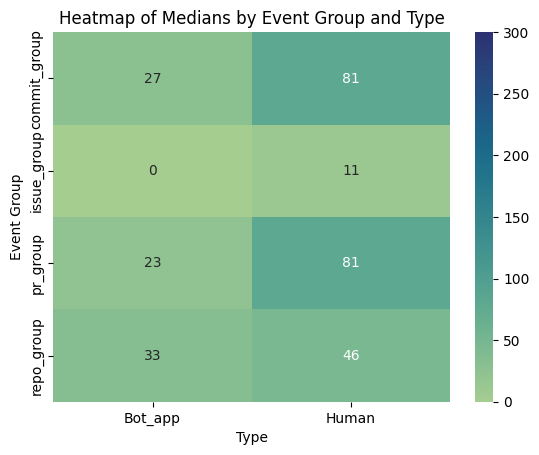

In [61]:
# YOUR CODE BELOW
import matplotlib.pyplot as plt
heatmap_data = df_real_medians.pivot(index='event_group', columns='type', values='median')
sns.heatmap(heatmap_data, annot=True, vmin=0, vmax=300, cmap="crest")
plt.title('Heatmap of Medians by Event Group and Type')
plt.xlabel('Type')
plt.ylabel('Event Group')
plt.show()

#### What is the difference that you observe between Bots+Apps and Humans?

In [57]:
# We can see that humans tend to create more events in general than bots as the medians are higher.

#### What is the differnce that you observe between Event groups?

In [ ]:
# We can see that the issue group has the smallest medians and the commit and pr groups have the highest medians.
# This means that users and bots tend to create more pr and commits than issues.

#### What is the difference that you observe between Bots+Apps and Humans and Event groups all considering at the same time?

In [ ]:
# We can see that humans have higher medians in all event groups and that bots are more specificly used in the repo_group 
# and not used at all in the issue group.

### Question 3

#### Create box plots or boxen plots or violin plots or a combination of these to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### For violin plots - https://seaborn.pydata.org/generated/seaborn.violinplot.html  
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

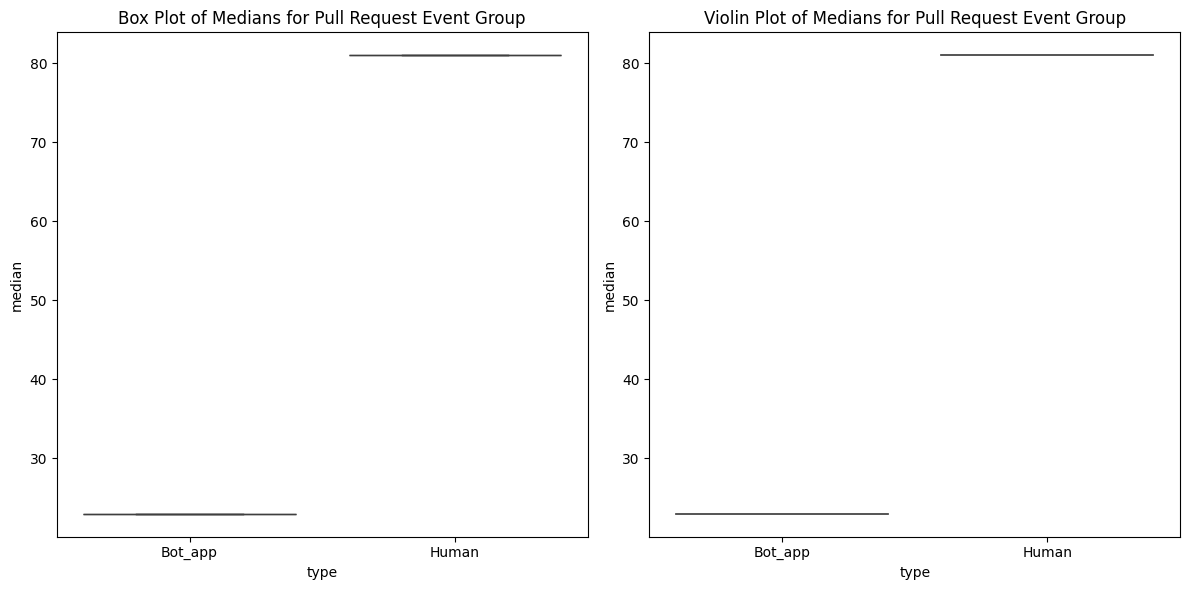

In [65]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
import matplotlib.pyplot as plt

pull_request_df = df_real_medians[df_real_medians['event_group'] == 'pr_group']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x='type', y='median', data=pull_request_df, ax=axes[0])
axes[0].set_title('Box Plot of Medians for Pull Request Event Group')

sns.violinplot(x='type', y='median', data=pull_request_df, ax=axes[1])
axes[1].set_title('Violin Plot of Medians for Pull Request Event Group')
plt.tight_layout()
plt.show()



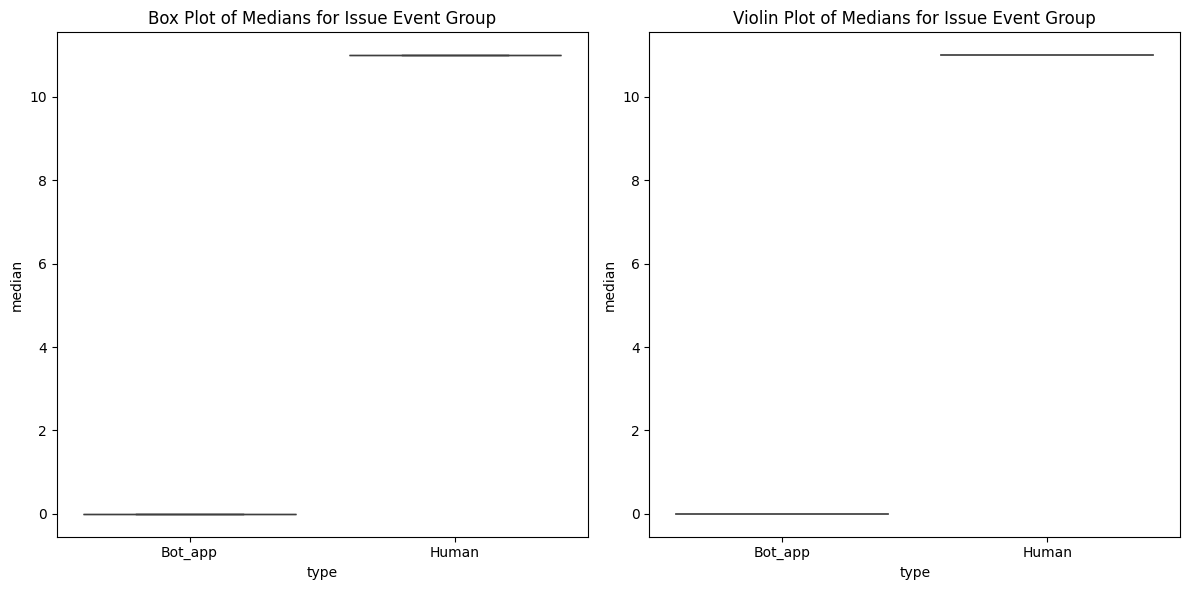

In [66]:
# YOUR CODE BELOW - Visualise number of events from issue event group
import matplotlib.pyplot as plt

pull_request_df = df_real_medians[df_real_medians['event_group'] == 'issue_group']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x='type', y='median', data=pull_request_df, ax=axes[0])
axes[0].set_title('Box Plot of Medians for Issue Event Group')

sns.violinplot(x='type', y='median', data=pull_request_df, ax=axes[1])
axes[1].set_title('Violin Plot of Medians for Issue Event Group')
plt.tight_layout()
plt.show()

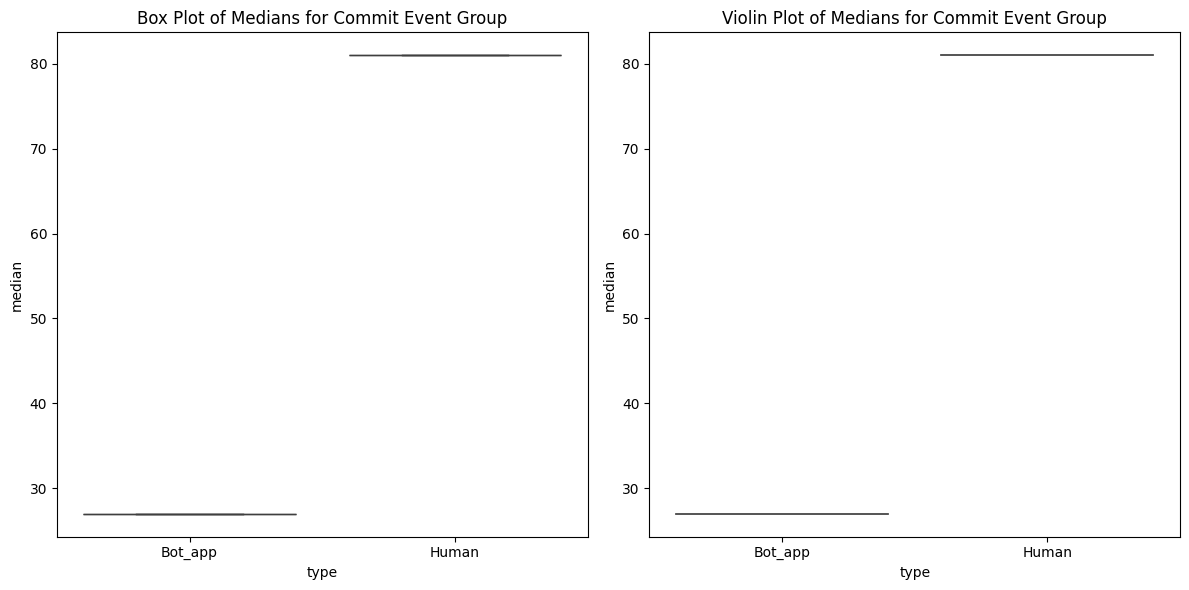

In [67]:
# YOUR CODE BELOW - Visualise number of events from commit event group
import matplotlib.pyplot as plt

pull_request_df = df_real_medians[df_real_medians['event_group'] == 'commit_group']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x='type', y='median', data=pull_request_df, ax=axes[0])
axes[0].set_title('Box Plot of Medians for Commit Event Group')

sns.violinplot(x='type', y='median', data=pull_request_df, ax=axes[1])
axes[1].set_title('Violin Plot of Medians for Commit Event Group')
plt.tight_layout()
plt.show()

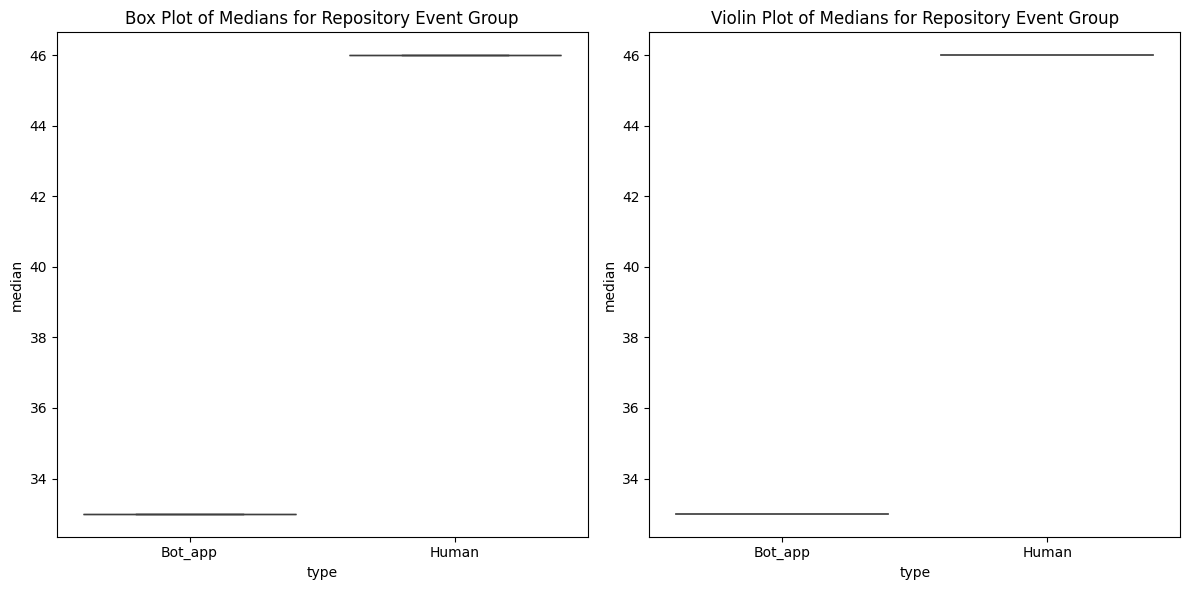

In [68]:
# YOUR CODE BELOW - Visualise number of events from repo event group
import matplotlib.pyplot as plt

pull_request_df = df_real_medians[df_real_medians['event_group'] == 'repo_group']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x='type', y='median', data=pull_request_df, ax=axes[0])
axes[0].set_title('Box Plot of Medians for Repository Event Group')

sns.violinplot(x='type', y='median', data=pull_request_df, ax=axes[1])
axes[1].set_title('Violin Plot of Medians for Repository Event Group')
plt.tight_layout()
plt.show()

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [ ]:
# YOUR CODE BELOW

### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [ ]:
# YOUR CODE BELOW

### Question 5
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values). This will return the effect size and its interpretation (negligible, small, medium, large).

In [ ]:
# YOU CODE BELOW

### Qusetion 6

#### Create violinplots to visualise the distributions for the following metrics and answer the questions that follow it. You should highlight the data points corresponding to bots using a stripplot in seaborn.

#### Hint:

1. Merge you DataFrame of event with the type of contributor that you identified in section 3.
2. Write a function that you will use for all the seaborn plots. This way you can reduce duplication and update it easily.

In [ ]:
# YOUR CODE BELOW - function for seaborn plot


#### Total number of events

In [ ]:
# YOUR CODE BELOW

#### Number of event types

In [ ]:
# YOUR CODE BELOW

#### Mean number of events per event type

In [ ]:
# YOUR CODE BELOW

#### Mean number of events per event group

In [ ]:
# YOUR CODE BELOW

#### Gini coeﬃcient of time between consecutive event

In [ ]:
def time_diffs(time_stamps):
    diff_time_stamps = np.array([])
    for i in range(len(time_stamps)-1):
        diff = (time_stamps.iloc[i+1] - time_stamps.iloc[i])/pd.to_timedelta('1 second')
        diff_time_stamps = np.append(diff_time_stamps, [diff])
    return(diff_time_stamps)

In [ ]:
def gini(time_stamps):
    '''
    args: time_stamps - Series of time stamps for a contributor
    
    return: g_coeff - float that gives gini coefficient
    
    method: calculate the Gini coefficient of a numpy array
    '''
    array = time_diffs(time_stamps)
    array = array[array!=0]
    if len(array) == 0:
        return np.float64(0.0)
    array = array.flatten()
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))
    
    return (g_coeff.round(4))

You can pass a Series of time-stamps to gini(time_stamps) function to get the Gini coeﬃcient
#### Hint:
1. Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'.
2. Merge the resultant DataFram with their type (the df that you got in section 4)
3. Make box/boxen/violin plots on those gini values

In [ ]:
# YOUR CODE BELOW


In [ ]:
# YOUR CODE BELOW


### Question 6.1

#### Do you ﬁnd any set of accounts having a diverging behaviour? (Hint: look for outliers.)

### Question 6.2

#### What is the type of the accounts that have diverging behaviour?

### Question 6.3

#### Do bots have different behaviour than apps? Motivate your answer

### Question 6.4

#### Do bots and apps have a diﬀerent behaviour from human accounts? (Hint: in the box plots ﬁnd where the bots and apps are located and find where the humans are located)

### Question 6.5

#### Do all bots (other than outliers) have the same behaviour? List the bots that have a diﬀerent behaviour. Mention your interpretation on the cause of this diverging behaviour compared to other bots?